In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pycaret.classification import setup, compare_models, models, create_model, predict_model
from pycaret.classification import tune_model, plot_model, evaluate_model, finalize_model
from pycaret.classification import save_model, load_model

In [2]:
df = pd.read_csv('Customer-Churn - Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),"118,75","8672,45",No
1,8984-HPEMB,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,"118,65","8477,6",No
2,5989-AXPUC,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,"118,6","7990,05",No
3,5734-EJKXG,Female,0,No,No,61,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,"118,6","7365,7",No
4,8199-ZLLSA,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),"118,35","7804,15",Yes


In [3]:
# Converter variáveis numéricas strings em float
df['MonthlyCharges'] = df['MonthlyCharges'].str.replace(',', '.').astype(float)
df['TotalCharges'] = df['TotalCharges'].str.replace(',', '.').astype(float)

In [4]:
# Preencher valores nulos com a mediana
df['TotalCharges'].fillna(value = df['TotalCharges'].median(), inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
test = df.sample(frac=0.10)
train = df.drop(test.index)

test.reset_index(inplace=True, drop=True)
train.reset_index(inplace=True, drop=True)

In [8]:
s = setup(df, target = 'Churn') #, ignore_features = ['customerID'])

,Description,Value
0,Session id,8442
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(7043, 21)"
5,Transformed data shape,"(7043, 42)"
6,Transformed train set shape,"(4930, 42)"
7,Transformed test set shape,"(2113, 42)"
8,Ordinal features,5
9,Numeric features,4


In [9]:
# Fazendo a comparação entre os modelos de machine learning
best_model = compare_models(sort='# verificando os modelos
models()AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7456,0.8371,0.0558,0.7938,0.1029,0.0714,0.1583,7.9370
nb,Naive Bayes,0.7047,0.8240,0.8494,0.4690,0.6042,0.3985,0.4436,1.1230
rf,Random Forest Classifier,0.7347,0.7718,0.0000,0.0000,0.0000,0.0000,0.0000,1.6790
knn,K Neighbors Classifier,0.7669,0.7433,0.4419,0.5799,0.5009,0.3527,0.3586,2.4730
xgboost,Extreme Gradient Boosting,0.7347,0.7271,0.0000,0.0000,0.0000,0.0000,0.0000,1.2020
et,Extra Trees Classifier,0.7347,0.7202,0.0000,0.0000,0.0000,0.0000,0.0000,1.6440
lightgbm,Light Gradient Boosting Machine,0.7347,0.5605,0.0000,0.0000,0.0000,0.0000,0.0000,1.0250
dt,Decision Tree Classifier,0.7347,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.9620
qda,Quadratic Discriminant Analysis,0.7347,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.9400
ada,Ada Boost Classifier,0.7347,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.8630


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [10]:
# Verificando o melhor modelo
print(best_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=8442, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [11]:
# verificando os modelos
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [12]:
# instanciando o modelo
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7343,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.7343,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.7343,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.7343,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.7343,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.7343,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.7343,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.7343,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.7363,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [13]:
# verificando os parâmetros
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=8442, splitter='best')


In [14]:
# tuning de parâmetros
tuned_dt = tune_model(dt, optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7627,0.7589,0.5191,0.5574,0.5375,0.3782,0.3786
1,0.7282,0.6760,0.4580,0.4878,0.4724,0.2896,0.2899
2,0.7789,0.7460,0.3206,0.6774,0.4352,0.3190,0.3535
3,0.7627,0.7539,0.5191,0.5574,0.5375,0.3782,0.3786
4,0.7931,0.7887,0.5496,0.6261,0.5854,0.4483,0.4500
5,0.7627,0.7590,0.5038,0.5593,0.5301,0.3719,0.3729
6,0.7647,0.7477,0.5191,0.5620,0.5397,0.3820,0.3825
7,0.7606,0.7163,0.4580,0.5607,0.5042,0.3486,0.3517
8,0.7769,0.7838,0.5462,0.5820,0.5635,0.4138,0.4142


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


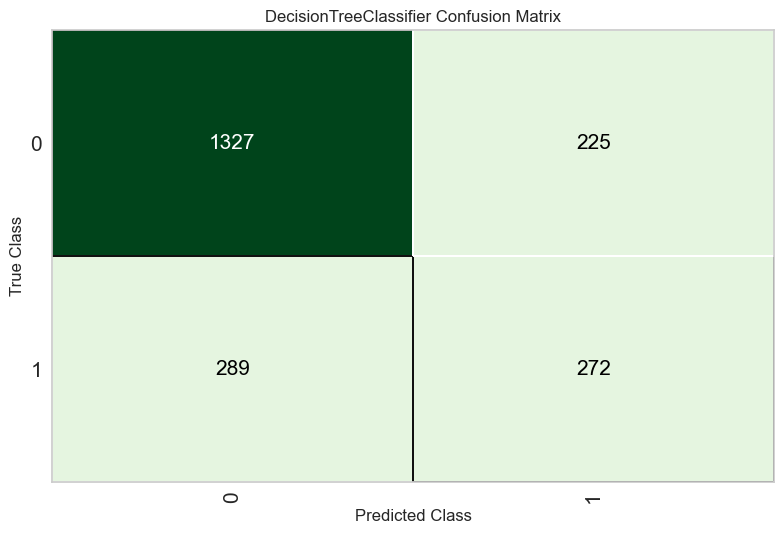

In [15]:
# plotando matriz de confusão
plot_model(tuned_dt, plot='confusion_matrix')

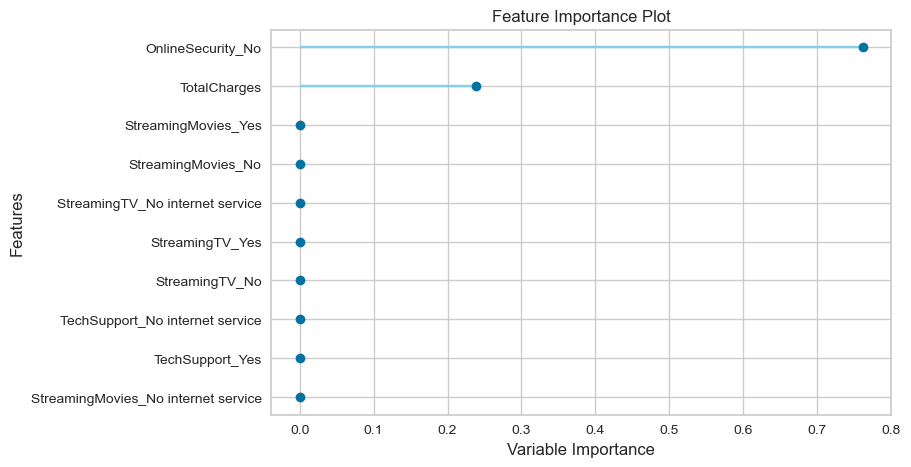

In [16]:
# Importância dos atributos
plot_model(tuned_dt, plot='feature')

In [17]:
# avaliando o modelo
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [18]:
# fazendo previsões
predict_model(tuned_dt)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.7567,0.7139,0.4848,0.5473,0.5142,0.3527,0.3539


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
1491,5708-EVONK,Female,0,Yes,Yes,58,Yes,Yes,Fiber optic,Yes,...,No,Yes,Month-to-month,Yes,Bank transfer (automatic),93.400002,5435.600098,1,No,0.8937
6201,4732-RRJZC,Male,0,Yes,Yes,7,Yes,No,No,No internet service,...,No internet service,No internet service,Month-to-month,No,Mailed check,20.250000,144.350006,0,No,0.8937
4074,2202-OUTMO,Female,0,Yes,No,34,Yes,Yes,DSL,Yes,...,No,No,Month-to-month,Yes,Bank transfer (automatic),60.849998,2003.599976,0,No,0.8937
5902,5324-KTGCG,Male,0,Yes,No,71,Yes,No,No,No internet service,...,No internet service,No internet service,One year,No,Electronic check,20.850000,1539.750000,0,No,0.8937
6691,0362-RAOQO,Female,0,No,No,40,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Credit card (automatic),19.650000,830.250000,0,No,0.8937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5684,9092-GDZKO,Male,0,No,No,22,Yes,Yes,No,No internet service,...,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),24.850000,493.399994,0,No,0.8937
4578,5619-PTMIK,Female,0,Yes,No,46,Yes,Yes,DSL,Yes,...,No,No,Month-to-month,No,Electronic check,53.099998,2459.800049,0,No,0.8937
3801,9253-VIFJQ,Male,0,Yes,No,65,Yes,Yes,DSL,Yes,...,No,No,One year,No,Credit card (automatic),67.050003,4309.549805,0,No,0.8937
5606,5334-AFQJB,Male,1,No,No,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,Two year,Yes,Credit card (automatic),25.100000,1789.900024,0,No,0.8937


In [19]:
# finalizando o modelo
final_dt = finalize_model(tuned_dt)

In [20]:
# verificando os parâmetros
print(final_dt)

Pipeline(memory=FastMemory(location=C:\Users\leand\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['SeniorCitizen', 'tenure',
                                             'MonthlyCharges', 'TotalCharges'],
                                    transformer=SimpleImputer(add_indicator=Fa...
                                                              min_samples_leaf=20,
                                                              return_df=True,
                                                              smoothing=10,
                                                              verbose=0))),
                ('actual_estimator',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_w

In [21]:
# fazendo previsões com conjunto de teste
test_preds = predict_model(final_dt, data=test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.7628,0.7306,0.5000,0.5389,0.5187,0.3616,0.3621


In [24]:
# salvando o modelo
save_model(final_dt, "decision_tree_model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\leand\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['SeniorCitizen', 'tenure',
                                              'MonthlyCharges', 'TotalCharges'],
                                     transformer=SimpleImputer(add_indicator=Fa...
                                                               min_samples_leaf=20,
                                                               return_df=True,
                                                               smoothing=10,
                                                               verbose=0))),
                 ('actual_estimator',
                  DecisionTreeClassifier(ccp_alp